# Vaccine Data Exploration of COVIDActNow API
## Jesse DeLaCruz

In [2]:
#import dependencies
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from config import covid_api

In [3]:
#setup base url and perform initial get request
covid_base_url = 'https://api.covidactnow.org/v2/states.json?apiKey='+covid_api
covid_json = requests.get(covid_base_url).json()
#covid_head = covid_json[]
#print out initial data
#print(json.dumps(covid_head, indent=4))

In [4]:
#create dataframe using concat
states_df2 = pd.DataFrame()
for state in covid_json:
    state_temp = pd.DataFrame({
        'State':[state['state']],
        'Population':[state['population']],
        
        'Vaccination Ratio':[state['metrics']['vaccinationsInitiatedRatio']],
        'Weekly New Cases (per 100k)':[state['metrics']['weeklyNewCasesPer100k']],
        'Infection Rate':[state['metrics']['infectionRate']],
        
        'Cases':[state['actuals']['cases']],
        'Deaths':[state['actuals']['deaths']],
        'Hospital Beds':[state['actuals']['hospitalBeds']['capacity']],
        'Covid ICU Usage':[state['actuals']['hospitalBeds']['currentUsageCovid']]
    })
    states_df2=pd.concat([
        states_df2,
        state_temp
    ], ignore_index=True)
states_df2.head()

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Cases,Deaths,Hospital Beds,Covid ICU Usage
0,AK,731545,0.726,67.5,1.06,300732,1390,1866,39
1,AL,4903185,0.647,118.4,1.34,1552527,21164,13436,417
2,AR,3017804,0.695,115.4,1.23,973879,12632,7406,325
3,AZ,7278717,0.768,219.6,1.22,2352189,31824,14772,1187
4,CA,39512223,0.841,201.0,1.31,11620250,100197,71283,5033


In [5]:
#states_df2.to_csv('StatesCleaned.csv')

In [5]:
# Create Dataframe including ALL Vaccines Info 
states_df3 = pd.DataFrame()
for state in covid_json:
    state_temp = pd.DataFrame({
        'State':[state['state']],
        'Population':[state['population']],
        
        'Vaccination Ratio':[state['metrics']['vaccinationsInitiatedRatio']],
        'Weekly New Cases (per 100k)':[state['metrics']['weeklyNewCasesPer100k']],
        'Infection Rate':[state['metrics']['infectionRate']],
        
        'Vaccines Initiated (1st Dose)':[state['actuals']['vaccinationsInitiated']],
        'Vaccinations Completed (1st & 2nd Dose)':[state['actuals']['vaccinationsCompleted']],
        'Vaccinations Additional Dose (1st, 2nd Dose & Booster)':[state['actuals']['vaccinationsAdditionalDose']],
        'Vaccines Administered':[state['actuals']['vaccinesAdministered']],
        'Vaccines Distributed':[state['actuals']['vaccinesDistributed']],

        'Cases':[state['actuals']['cases']],
        'Deaths':[state['actuals']['deaths']],
        'Hospital Beds':[state['actuals']['hospitalBeds']['capacity']],
        'Covid ICU Usage':[state['actuals']['hospitalBeds']['currentUsageCovid']]
    })
    states_df3=pd.concat([
        states_df3,
        state_temp
    ], ignore_index=True)
states_df3.tail(30)

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Vaccines Initiated (1st Dose),Vaccinations Completed (1st & 2nd Dose),"Vaccinations Additional Dose (1st, 2nd Dose & Booster)",Vaccines Administered,Vaccines Distributed,Cases,Deaths,Hospital Beds,Covid ICU Usage
23,MN,5639632,0.783,112.8,1.13,4415237,4044509,2525756,12384874,17184690,1719549,14155,9603,680
24,MO,6137428,0.689,128.8,1.16,4230214,3601006,1688561,10254206,14808875,1719890,23145,15274,1027
25,MP,53605,0.864,None,None,46340,43770,23056,114967,142580,11829,41,None,None
26,MS,2976149,0.614,113.5,1.51,1827014,1591381,648370,4217806,6891465,943402,13082,8284,247
27,MT,1068778,0.679,105.6,1.14,725439,629274,326658,1822085,2574175,320323,3628,2608,79
28,NC,10488084,None,110.6,1.28,6988154,6545097,3849078,None,None,3282404,28735,21029,1771
29,ND,762062,0.689,135.6,1.21,524996,444012,213096,1276889,1794020,278399,2457,1478,50
30,NE,1934408,0.73,188.5,1.31,1411613,1274498,700112,3707855,5162290,548352,4830,4598,279
31,NH,1359711,None,83.8,1.17,None,None,None,None,None,363029,2832,2526,84
32,NJ,8882190,0.94,189.3,1.16,8350314,6983960,3586569,19342608,27833645,2870860,35254,23537,1351


In [7]:
states_df3.to_csv('StatesCleaned_Vaccine.csv')

In [6]:
# Import the Clean Vaccine dataset, drop missing data 'NaN' found in Vaccine Counts
vacc_data = pd.read_csv('StatesCleaned_Vaccine.csv')
# drops n/a in columns
vacc_data = vacc_data.drop('Unnamed: 0',axis=1)
vacc_data = vacc_data.dropna()
vacc_data

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Vaccines Initiated (1st Dose),Vaccinations Completed (1st & 2nd Dose),"Vaccinations Additional Dose (1st, 2nd Dose & Booster)",Vaccines Administered,Vaccines Distributed,Cases,Deaths,Hospital Beds,Covid ICU Usage
0,AK,731545,0.726,67.5,1.06,531132.0,474396.0,231325.0,1295275.0,2036055.0,300732,1390,1866.0,39.0
1,AL,4903185,0.647,118.4,1.34,3173348.0,2594922.0,1019451.0,6888090.0,11790000.0,1552527,21164,13436.0,417.0
2,AR,3017804,0.695,115.4,1.23,2096050.0,1707152.0,750542.0,4768177.0,7923850.0,973879,12632,7406.0,325.0
3,AZ,7278717,0.768,219.6,1.22,5586984.0,4777579.0,2353283.0,14161294.0,18753570.0,2352189,31824,14772.0,1187.0
4,CA,39512223,0.841,201.0,1.31,33228217.0,29332815.0,17031375.0,85662449.0,113995935.0,11620250,100197,71283.0,5033.0
5,CO,5758736,0.832,121.7,1.02,4790419.0,4210992.0,2402801.0,12682240.0,16590225.0,1718247,13724,10338.0,464.0
6,CT,3565287,0.950,114.1,1.11,3620182.0,2944000.0,1618778.0,8801850.0,11275525.0,931957,11603,7502.0,589.0
8,DE,973764,0.867,119.3,1.19,844064.0,701410.0,347717.0,2023149.0,3123235.0,318567,3184,2569.0,198.0
9,FL,21477737,0.820,72.0,1.34,17603034.0,14833950.0,6451166.0,41294081.0,58367165.0,7223005,83200,54450.0,1829.0
10,GA,10617423,0.679,91.4,1.43,7209887.0,6042815.0,2611542.0,16665029.0,27215605.0,2867072,39748,21472.0,1215.0


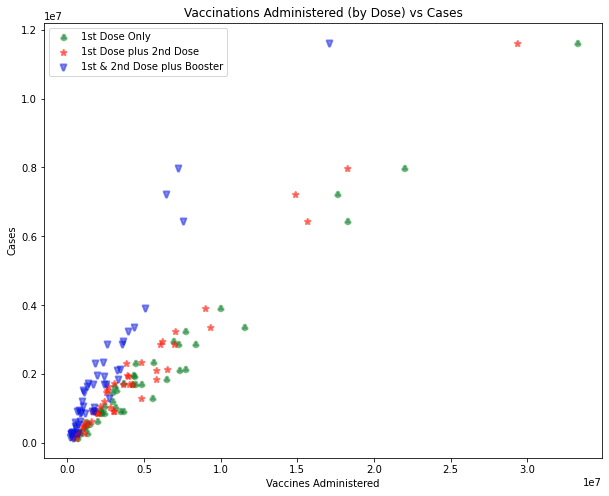

In [82]:
# Create a scatter plot for cases vs vaccines
#fig1, ax1 = plt.subplots(figsize=(10,8))
x_values = vacc_data['Vaccines Initiated (1st Dose)']
x2_values = vacc_data['Vaccinations Completed (1st & 2nd Dose)']
x3_values = vacc_data['Vaccinations Additional Dose (1st, 2nd Dose & Booster)']
y_values = vacc_data['Cases']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.50, edgecolors = "g", linewidths = 2, marker=r'$\clubsuit$', label="1st Dose Only")
plt.scatter(x2_values, y_values,alpha = 0.50, edgecolors = "r", linewidths = 2, marker=r'$\bigstar$', label="1st Dose plus 2nd Dose")
plt.scatter(x3_values, y_values,alpha = 0.50, edgecolors = "b", linewidths = 2, marker=r'$\nabla$', label="1st & 2nd Dose plus Booster")
plt.xlabel('Vaccines Administered')
plt.ylabel('Cases')
plt.title("Vaccinations Administered (by Dose) vs Cases")
plt.savefig("scatter_allvaccines_cases.png", bbox_inches="tight")
ax1.legend()
plt.show()

In [21]:
# The Pearson correlation coefficient between "1st Vaccine Dose" and "Cases"
cases = vacc_data.iloc[:,7]
first_dose = vacc_data.iloc[:,12]
correlation = st.pearsonr(cases,first_dose)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.92


In [22]:
# VACCINE PIE
vaccines = ["1st Dose", "2nd Dose", "Booster"]
actuals = [4410896, 4040479, 2517728]
colors = ["yellowgreen", "red", "lightskyblue"]
explode = (0.05, 0, 0)

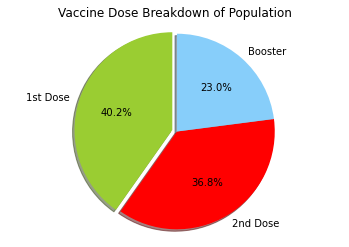

In [25]:
plt.title("Vaccine Dose Breakdown of Population")
plt.pie(actuals, explode=explode, labels=vaccines, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("vacc_dose_pop_pie.png")
plt.show()